In [1]:


# Imports: 
import numpy as np; 
import scipy
import matplotlib.pyplot as plt; 
from mpl_toolkits import mplot3d; 
import networkx as nx; 
import os, sys; 


def saveDict(fToSave, dictToSave): 


	fOut1 = open(fToSave + "_keys.csv", 'w'); 
	fOut2 = open(fToSave + "_coord.csv", 'w'); 
	for key in dictToSave.keys(): 
		fOut1.write(str(key)+'\n'); 
		fOut2.write(str(dictToSave[key][0])+', '+str(dictToSave[key][1])+'\n'); 
	fOut1.close(); 
	fOut2.close(); 

	return; 

def readDict(fToRead): 
	"""	readDict function: 

			This function reads a 2-D node layout that has been stored as a dictionary from the above function. 

			Inputs: 
				>> fToRead: Base name for the file from where to read the data. 
					- From here, two files are created: $fToSave + "_keys.csv" and $fToSave + "_coord.csv". 

			Returns: 
				<< newDict: A dictionary containing the name of nodes and their position for a 2D layout. 

	"""

	newDict = {}; 
	fIn1 = open(fToRead + "_keys.csv", 'r'); 
	fIn2 = open(fToRead + "_coord.csv", 'r'); 

	keys = fIn1.read().splitlines(); 
	values = np.loadtxt(fIn2, delimiter=',', converters=float); 
	for (iKey, key) in enumerate(keys): 
		newDict[int(key)] = np.array(values[iKey, :]); 

	return newDict; 



# Variables to assit on loading (e.g. number of nodes, etc): 
nLoad = 1000; 
regionName = "r1"; 
dicFolder = {}; 
dicFolder["r1"] = "Reg1/"; 
dicFolder["r2"] = "Reg2/"; 
dicFolder["r3"] = "Reg3/"; 
fReadPositions = False; 

# Defining paths and names: 
dataPathBase = "./Data/"; 
subNetworkPath = os.path.join(dataPathBase, "GN/SubNetworks_nNodes-" + str(nLoad)); 
abundacesPath = os.path.join(dataPathBase, "Abundances/"); 
figPathOut = "./Pics/PlotsGN_"+str(regionName)+"_nNodes-"+str(nLoad)+'/'; 
strCall = "mkdir "+figPathOut; 
os.system(strCall); 


# Reading list of files to process: 
fIn = open(os.path.join(dataPathBase+"fileNames.csv"), 'r'); 
allFileNames = fIn.read().splitlines(); 
fIn.close(); 


## Building the union network: 

# Loading edges: 
edges = np.loadtxt(os.path.join(subNetworkPath, "edges.csv"), delimiter=','); 
abundancesDict = {}; 

mkdir: cannot create directory ‘./Pics/PlotsGN_r1_nNodes-100/’: File exists


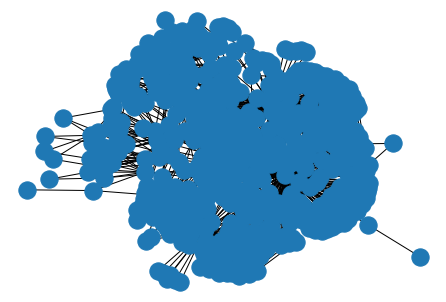

In [3]:
# Building graph: 
G = nx.Graph(); 
G.add_edges_from(edges); 
positionsFName = figPathOut + "nodePositions"; 
if (fReadPositions): 
	nodePositions = readDict(positionsFName); 
else: 
	nodePositions = nx.spring_layout(G); 
	saveDict(positionsFName, nodePositions); 
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G=G0
# Producing plot: 
fig = plt.figure(); 
nx.draw(G, pos=nodePositions); 
fig.savefig(figPathOut + "unionSubNetwork.png"); 

In [4]:
# Loop over experimental conditions that we wish to plot: 
for thisFName in allFileNames: 
	print("Processing "+thisFName); 

	# Reset abundance dict: 
	for node in G.nodes: 
		abundancesDict[node] = 0; 
	# Reading abundance of top nLoad nodes in experimental condition: 
	genotypeIDs_and_abundances = np.loadtxt(os.path.join(abundacesPath, thisFName+".csv"), delimiter=','); 
	thisGenotypeIDs = genotypeIDs_and_abundances[0:nLoad,0]; 
	thisAbundances = genotypeIDs_and_abundances[0:nLoad,1]; 
	for (gID, abundance) in zip(thisGenotypeIDs, thisAbundances): 
		abundancesDict[gID] = abundance; 

	# Rescaling for style -- play around with this! 
	abundancesToPlot = [10.0*np.log10(1+abundancesDict[node]) for node in G.nodes]; 
	# abundancesToPlot = [0.01*abundancesDict[node] for node in G.nodes]; 
	
	# Producing plot: 
	fig = plt.figure(); 
	nx.drawing.nx_pylab.draw_networkx_edges(G, pos=nodePositions); 
	nx.drawing.nx_pylab.draw_networkx_nodes(G, pos=nodePositions, node_size=abundancesToPlot);
	#plt.tight_layout()
	if thisFName[0] == 'c':
		step = int(thisFName.split('-')[1][1:])
		print(step)
	elif thisFName[0] == '3':
		step = int(thisFName.split('-')[2])
		print(step)
    
	plt.title(f'step={step}')
	#plt.text(.01, .99, 'matplotlib', ha='left', va='top')
	# nx.draw(G, pos=nodePositions, node_size=abundancesToPlot); 
	fig.savefig(figPathOut + "png/subNetwork_"+thisFName+".png", dpi=300, format='png'); 
	plt.close(fig);

Processing 30-1-02-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
2
Processing 30-1-04-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
4
Processing 30-1-06-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
6
Processing 30-1-08-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
8
Processing 30-1-10-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
10
Processing 30-1-12-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
12
Processing 30-1-14-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
14
Processing 30-1-16-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
16
Processing 30-1-18-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
18
Processing 30-1-20-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
20
Processing 30-1-22-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
22
Processing 30-1-23-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed
23
Processing 30-1-25-E

In [5]:
#generate empty plot
nLoad = 1000; 
temps = [30,43]
fIn = open(os.path.join(dataPathBase+"fileNames.csv"), 'r'); 
allFileNames = fIn.read().splitlines();

allFileNames_dict = {t:{} for t in temps}

for a in allFileNames:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        allFileNames_dict[t][step] = a
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        allFileNames_dict[t][step] = a
    

In [6]:
allFileNames_dict

{30: {2: '30-1-02-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  4: '30-1-04-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  6: '30-1-06-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  8: '30-1-08-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  10: '30-1-10-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  12: '30-1-12-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  14: '30-1-14-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  16: '30-1-16-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  18: '30-1-18-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  20: '30-1-20-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  22: '30-1-22-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  23: '30-1-23-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',
  25: '30-1-25-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed',

In [7]:
from matplotlib import animation

2
4
6
8
10
12
14
16
18
20
22
23
25
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58


MovieWriter ffmpeg unavailable; using Pillow instead.


60
1
2
4
6
8
10
12
14
16
18
20
22
23
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58


MovieWriter ffmpeg unavailable; using Pillow instead.


60


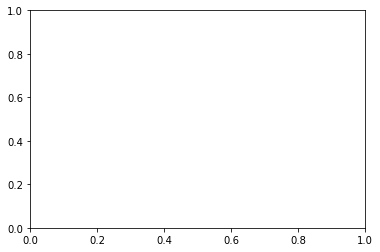

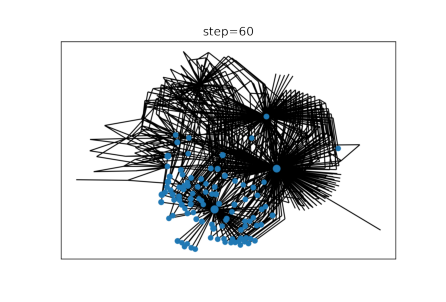

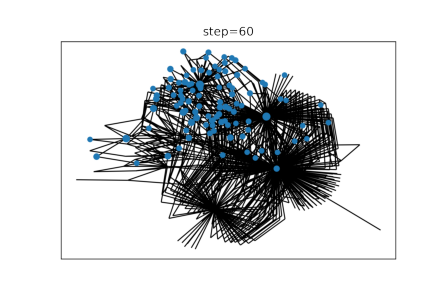

In [8]:
# Create new figure for GIF
fig, ax = plt.subplots()

# Adjust figure so GIF does not have extra whitespace


temps = [30,43]

for t in temps:
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis('off')
    ims = []
    L = list(allFileNames_dict[t].keys())
    L.sort()
    for m in range(len(L)):
        step = L[m]
        print(step)
        a = allFileNames_dict[t][step]
        im = ax.imshow(plt.imread(f'{figPathOut}png/subNetwork_{a}.png'), animated = True)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=600)
    ani.save(f'{figPathOut}evolution_t_{t}.gif')